<a href="https://colab.research.google.com/github/Molvilada/ProyectoCompiladores/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Grupo conformado por:** Javier Fernando Gonzalez Guzman y Laura Daniela Molina Villar


El archivo que se tiene que subir es un txt, conformado de la siguiente manera:


*   Los no terminales solo pueden ser letras mayúsculas, y conformados por UNA sola letra
*   Si una regla tiene más de una producción, se van a separar con el carácter | 
*   Para utilizar epsilon se debe emplear el símbolo €
*   Los terminales deben ir al final de documento, separados por espacios en blanco

Ejemplo:

*gramatica.txt*


S -> (A)

A -> CB

B -> ;A | €

C -> x | S



( ) ; €






In [ ]:
from google.colab import files


uploaded = files.upload()
print(uploaded)

Saving gramatica_clase.txt to gramatica_clase.txt
{'gramatica_clase.txt': b'E -> TA\r\nA -> +TA | \xe2\x82\xac\r\nT -> FB\r\nB -> *FB | \xe2\x82\xac\r\nF -> (E) | id\r\n\r\n+ * id \xe2\x82\xac'}


In [ ]:
!ls

gramatica_clase.txt  sample_data


In [ ]:
!rm gramatica_clase.txt

In [ ]:
!rm gramatica.txt

In [ ]:
pip install anytree

     |████████████████████████████████| 41 kB 454 kB/s 


In [ ]:
pip install graphviz

In [ ]:
import itertools
import json
from anytree import Node, RenderTree, util
from anytree.exporter import UniqueDotExporter
from IPython.display import Image

In [ ]:
gramatica = {}
primerosTotal = {}
primerosPorProduccion = {}
siguientesTotal = {}
noTerminales = []
terminales = []
nombreArchivo = "gramatica_clase.txt"

def lecturaGramatica():
  global terminales
  fichero = open(nombreArchivo)
  lineas = fichero.readlines()
  for i in range(0, len(lineas) -2):
    produccion = lineas[i].strip().replace(" ", "").split("->")
    produccion[1] = produccion[1].split("|") 
    gramatica[produccion[0]] = produccion[1] 
    noTerminales.append(produccion[0])
  terminales = lineas[-1].split(" ")
  

def generarPrimeros(produccion): 
  primeros = []
  if(produccion[0] not in noTerminales):
    terminalActual = ""
    i = 0
    noTerminalEncontrado = False
    while(not noTerminalEncontrado and i <= len(produccion) - 1):
      if (produccion[i] in noTerminales):
        noTerminalEncontrado = True
      else:
        terminalActual = terminalActual + produccion[i]
        i = i + 1
    primeros.append(terminalActual)
  else:
    for caracter in produccion:
      if(caracter in terminales):
        break
      elif(caracter == reglaActual):
        continue
      else:
        if(caracter in primerosTotal.keys()):
          primeros.extend(primerosTotal[caracter])
        else:
          for prod in gramatica[caracter]:
            primeros.extend(generarPrimeros(prod))
          if("€" not in primeros):
            break
        if(caracter != produccion[-1] and "€" in primeros):
            primeros = [i for i in primeros if i!="€"]
  return list(set(primeros))



reglaActual = None

def generarPrimerosTotales():
  global reglaActual
  for key in noTerminales:  
    primerosTotal[key] = []
    primerosPorProduccion[key] = []  
    reglaActual = key
    for produccion in gramatica[key]: 
      primerosPorProduccion[key].append(generarPrimeros(produccion)) 
      primerosTotal[key] = list(set(list(itertools.chain.from_iterable(primerosPorProduccion[key]))))
    reglaActual = None


def completarSiguientes(noTerminal, siguientesVisitados): 
    siguientesVisitados[noTerminal] = True
    siguientesCopy = siguientesTotal[noTerminal].copy()
    for caracter in siguientesTotal[noTerminal]:
      if caracter in noTerminales:
        if siguientesVisitados[caracter] == False:
          siguientesCopy.extend(completarSiguientes(caracter, siguientesVisitados))
          siguientesCopy.remove(caracter)
          if(noTerminal in siguientesCopy):
            siguientesCopy.remove(noTerminal)
        else:
          siguientesCopy.extend(siguientesTotal[caracter])
          siguientesCopy.remove(caracter)
          if(noTerminal in siguientesCopy):
            siguientesCopy.remove(noTerminal)
    siguientesTotal[noTerminal] = siguientesCopy
    return siguientesTotal[noTerminal]

def generarSiguientesTotales():
  for i in range(0, len(noTerminales)):
    key = noTerminales[i] 
    if i == 0:
      siguientesTotal[key] = ["$"]
    for produccion in gramatica[key]: 
      for j in range(0, len(produccion)):
        if produccion[j] not in noTerminales:
          continue
        else:
          if(produccion[j] not in siguientesTotal.keys()):
            siguientesTotal[produccion[j]] = []
          if(j != len(produccion) - 1):
            siguientesTotal[produccion[j]].extend(generarPrimeros(produccion[j+1:]))
            if("€" in siguientesTotal[produccion[j]]):
              siguientesTotal[produccion[j]].remove("€")
              siguientesTotal[produccion[j]].extend(key)
          else:
            if produccion[j] != key:
              siguientesTotal[produccion[j]].extend(key)

  for key in siguientesTotal.keys():  
    siguientesVisitados = dict.fromkeys(siguientesTotal.keys(), False)
    completarSiguientes(key,siguientesVisitados)
    siguientesTotal[key] = list(set(siguientesTotal[key]))

In [ ]:
lecturaGramatica()
print(json.dumps(gramatica, indent=4, ensure_ascii=False))

{
    "E": [
        "TA"
    ],
    "A": [
        "+TA",
        "€"
    ],
    "T": [
        "FB"
    ],
    "B": [
        "*FB",
        "€"
    ],
    "F": [
        "(E)",
        "id"
    ]
}


In [ ]:
print(noTerminales)
print(terminales)

['E', 'A', 'T', 'B', 'F']
['+', '*', 'id', '€']


In [ ]:
generarPrimerosTotales()
print(json.dumps(primerosTotal, indent=4, ensure_ascii=False))

{
    "E": [
        "id",
        "("
    ],
    "A": [
        "+",
        "€"
    ],
    "T": [
        "id",
        "("
    ],
    "B": [
        "*",
        "€"
    ],
    "F": [
        "id",
        "("
    ]
}


In [ ]:
generarSiguientesTotales()
print(json.dumps(siguientesTotal, indent=4, ensure_ascii=False))

{
    "E": [
        ")",
        "$"
    ],
    "T": [
        ")",
        "+",
        "$"
    ],
    "A": [
        ")",
        "$"
    ],
    "F": [
        ")",
        "*",
        "$",
        "+"
    ],
    "B": [
        ")",
        "+",
        "$"
    ]
}


In [ ]:
tablaParsing = {}

def generarTablaParsing():
  for key in noTerminales:
    tablaParsing[key] = {}
    if primerosTotal[key]:
      produccion = 0
      for primerosProduccion in primerosPorProduccion[key]:
        for i in range(0, len(primerosProduccion)):
          if primerosProduccion[i] != "€":
            tablaParsing[key][primerosProduccion[i]] = gramatica[key][produccion]
          else:
            for siguiente in siguientesTotal[key]:
              tablaParsing[key][siguiente] = gramatica[key][produccion]
        produccion += 1

In [ ]:
generarTablaParsing()
print(json.dumps(tablaParsing, indent=4, ensure_ascii=False))

{
    "E": {
        "id": "TA",
        "(": "TA"
    },
    "A": {
        "+": "+TA",
        ")": "€",
        "$": "€"
    },
    "T": {
        "id": "FB",
        "(": "FB"
    },
    "B": {
        "*": "*FB",
        ")": "€",
        "+": "€",
        "$": "€"
    },
    "F": {
        "(": "(E)",
        "id": "id"
    }
}


In [ ]:
tokens = []

def tokenize(s):
  global tokens
  s += " $"
  tokens = s.split(" ")
  lecturaGramatica()

In [ ]:
def analisisSintacticoPredictivo():
  pila = ["$"]
  pila.append(noTerminales[0])
  tokenActual = 0
  a = tokens[tokenActual]
  X = pila[-1]
  root = Node(X)
  padre = root
  while(X != "$"):
    if X == a:
      for hijo in padre.children:
        if hijo.name == X:
          padre = hijo
      while(util.leftsibling(padre) == None and padre != root):
          padre = padre.parent
      if padre != root:
        padre = padre.parent
      pila.pop(-1)
      tokenActual += 1
      a = tokens[tokenActual]
    elif X in terminales and X != "€":
      print("Error, ", X, "es un terminal")
      return
    elif X == "€":
      for hijo in padre.children:
        if hijo.name == X:
          padre = hijo
      while(util.leftsibling(padre) == None and padre != root):
          padre = padre.parent
      if padre != root:
        padre = padre.parent
      pila.pop(-1)
    elif X not in tablaParsing:
      print("Error", X, "no está en la tabla parsing")
      return
    elif X in tablaParsing:
      if a not in tablaParsing[X]:
        print("Error", X, a, "no está en la tabla parsing")
        return
      else: 
        if padre != None:
          for hijo in padre.children:
            if hijo.name == pila[-1]:
              padre = hijo
              break
        pila.pop(-1)
        terminalActual = ""
        for caracter in tablaParsing[X][a][::-1]:
          if caracter in noTerminales:
            if padre != None:
              Node(caracter, parent=padre)
            pila.append(caracter)  
          else:        
            terminalActual += caracter
          if terminalActual[::-1] in terminales: 
            if padre != None:
              Node(terminalActual[::-1], parent=padre)
            pila.append(terminalActual[::-1])
            terminalActual = ""
    X = pila[-1]
  for pre, fill, node in RenderTree(root, childiter=reversed):
    print("%s%s" % (pre, node.name))
  UniqueDotExporter(root).to_picture("arbol.png")

In [ ]:
tokenize("id + id * id")
#tokenize("( x ; ( x ) )")

In [ ]:
print(tokens)

['id', '+', 'id', '*', 'id', '$']


In [ ]:
analisisSintacticoPredictivo()

E
├── T
│   ├── F
│   │   └── id
│   └── B
│       └── €
└── A
    ├── +
    ├── T
    │   ├── F
    │   │   └── id
    │   └── B
    │       ├── *
    │       ├── F
    │       │   └── id
    │       └── B
    │           └── €
    └── A
        └── €


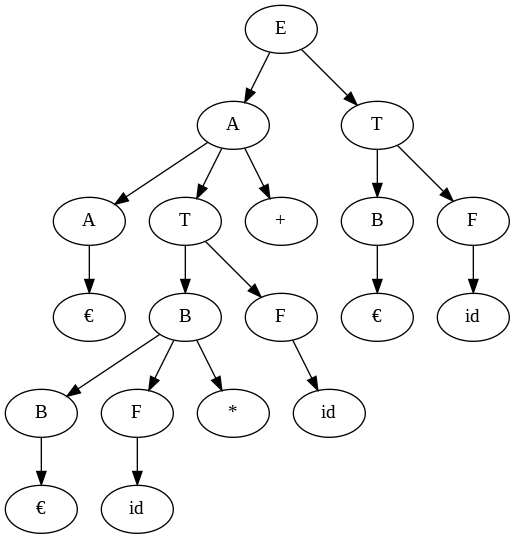

In [ ]:
Image('arbol.png')
# Se uso una libreria para crear la imagen del arbol, pero fue imposible decirle el orden de los nodos, por lo cuál se ven los nodos de derecha a izquierda en vez de izquierda a derecha